# ............................K-Nearest Neighbors (Cryotherapy Dataset).......................

### About Dataset
Data yang digunakan adalah Cryotherapy Dataset yang diperoleh dari https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+#


                                              Attribute Information
                                            
                                        Sex                 : Jenis Kelamin
                                        Age                 : Umur
                                        Time                : Waktu Treatment 
                                        Number of Warts     : Jumlah Kutil
                                        Type                : Jenis Kutil
                                        Area                : Luas Area Kutil
                                        Result of Treatment : Hasil Tratment
                                        
                                   ................................................                    

Berdasarkan Data Cryotherapy Dataset dapat diketahui bahwa terdapat 90 data yang menjelaskan tentang hasil perawatan kutil. Dalam data ini terdapat 7 variabel yaitu Sex , Age , Time , Number of Warts , Type , Area dan Result of Treatment. Klasifikasi Data Cryotherapy yaitu Sex : 1 = laki-laki 2 = wanita ; Type : 1 = kutil biasa 2 = kutil plantar 3 = kutil lainnya ; Result of Treatment : 1 = sembuh 0 = tidak sembuh.
                                       
====================================================================================================================

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### Load Data From CSV File

In [6]:
df = pd.read_csv('Cryotherapy.csv')
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
sex                    90 non-null int64
age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


### Data Visualization and Anylisis

In [8]:
df['Result_of_Treatment'].value_counts()

1    48
0    42
Name: Result_of_Treatment, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212DF31A550>]],
      dtype=object)

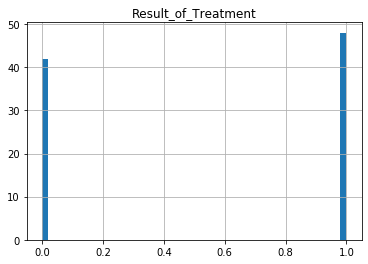

In [9]:
df.hist(column='Result_of_Treatment', bins=50)

#### Feature set

In [10]:
df.columns

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'Result_of_Treatment'],
      dtype='object')

In [11]:
X = df[['sex', 'age','Time', 'Number_of_Warts', 'Type', 'Area', 'Result_of_Treatment']] .values  #.astype(float)
X[0:5]

array([[  1.  ,  35.  ,  12.  ,   5.  ,   1.  , 100.  ,   0.  ],
       [  1.  ,  29.  ,   7.  ,   5.  ,   1.  ,  96.  ,   1.  ],
       [  1.  ,  50.  ,   8.  ,   1.  ,   3.  , 132.  ,   0.  ],
       [  1.  ,  32.  ,  11.75,   7.  ,   3.  , 750.  ,   0.  ],
       [  1.  ,  67.  ,   9.25,   1.  ,   1.  ,  42.  ,   0.  ]])

In [12]:
y = df['Result_of_Treatment'].values
y[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

### Normalize Data

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.95650071,  0.48169494,  1.27914409, -0.14408528, -0.77777778,
         0.10814311, -1.06904497],
       [-0.95650071,  0.03010593, -0.1967914 , -0.14408528, -0.77777778,
         0.07760858,  0.93541435],
       [-0.95650071,  1.61066744,  0.0983957 , -1.27170917,  1.44444444,
         0.3524193 , -1.06904497],
       [-0.95650071,  0.25590043,  1.20534732,  0.41972667,  1.44444444,
         5.07000328, -1.06904497],
       [-0.95650071,  2.89016961,  0.46737957, -1.27170917, -0.77777778,
        -0.33460749, -1.06904497]])

#### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (72, 7) (72,)
Test set: (18, 7) (18,)


### Classification (K nearest neighbor (K-NN))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

In [16]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

#### Predicting

In [17]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

#### Accuracy evaluation

In [18]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9444444444444444


In [19]:
# write your code here
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9861111111111112
Test set Accuracy:  0.9444444444444444


In [20]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.94444444, 0.94444444, 0.94444444, 0.94444444])

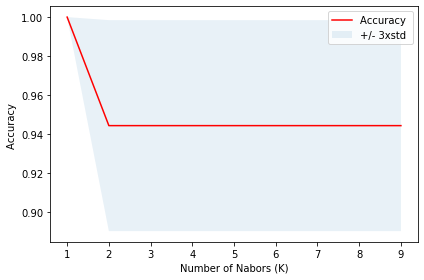

In [24]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


Berdasarkan nilai output diatas , maka dapat diketahui bahwa nilai akurasi yang didapatkan yaitu 0.944 atau 94,4%.